In [10]:
%run 4.2_AutoDL.ipynb

In [11]:
#Librairies
import joblib
from joblib import dump, load

#Tf & Keras
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip,RandomZoom,RandomWidth,Rescaling,RandomRotation
from tensorflow.keras.layers import RandomBrightness, Lambda
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.efficientnet import preprocess_input

In [12]:
#Choix des différentes variables de notre fonction test_DL

#chemin où sont stockées les images d'entrainement classées 
repertoire_train = get_output_path_folder("images_traitees_classe_train")

#chemin où sont stockées les images de test
repertoire_test = get_output_path_folder("images_traitees_classe_test")  ###Ajout FL pour les prédictions

#chemin où est stocké le dataFrame de suivi
chemin_df_score_DL = get_output_path_file("df_score_DL_franck.joblib")

#Nos variables
image_size = (224,224)
batch_size = 30
epochs = 10
validation_split = 0.2
seed = 123


#DataAugmentation
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(image_size[0],
                                  image_size[1],
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

"""#DataAugmentation
data_augmentation = keras.Sequential([
   RandomFlip("horizontal",seed=123),     #Inversion horizontale aléatoire des images
   RandomZoom(height_factor=(-0.05, -0.15),width_factor=(-0.05, -0.15),seed=123), #Zoom aléatoire des images jusqu'à 15%
   RandomWidth(factor=(0.2, 0.3), interpolation='bilinear', seed=123), #ajustement aléatoire de la largeur d'un batch d'images par un facteur aléatoire
   RandomBrightness(factor =(0.1, 0.3), value_range=(0, 255), seed=123),#ajustement aléatoire de la luminosité d'images d'entrée RGB, différents facteurs par images d'un même batch
   RandomRotation(0.2)
])"""
# voir par exemple : https://www.tensorflow.org/tutorials/images/data_augmentation?hl=fr

#Notre modèle à tester, éventuellement une liste de modèles

#modèle pré entrainé
from tensorflow.keras.applications import EfficientNetB4

base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  

#Instanciation d'un modèle
model = Sequential()

#preprocessing lié au mobileNetV2
model.add(Lambda(preprocess_input))

#data_augmentation) 
model.add(data_augmentation)

#ajout du modèle de base mobileNetV2
model.add(base_model)
model.add(GlobalAveragePooling2D()) 
"""model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.3))"""
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(27, activation='softmax'))

liste_modele=[model]

#les variables lors du .compile
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.001)

optimizer=adam
loss='categorical_crossentropy'
metrics=['acc']

#nom fichier contrrôle
fichier_controle = 'modele_EfficientNetB4_f8 : nouvelle augmentation et retrait couche dense 1024 et full step'

#lancement de la fonction test_DL
df_score_DL = test_DL_predict2(repertoire_train,repertoire_test,image_size,batch_size,validation_split,liste_modele,optimizer,loss,metrics,epochs,chemin_df_score_DL,fichier_controle)

#sauvegarde dans le même répertoire 
dump(df_score_DL,get_output_path_file("df_score_DL_franck.joblib"))

Found 67931 files belonging to 27 classes.
Using 54345 files for training.
Found 67931 files belonging to 27 classes.
Using 13586 files for validation.
Found 16983 files belonging to 27 classes.
récupération du df existant
debut de l'entrainement du modèle 0
Epoch 1/10
1812/1812 [==============================] - 5605s 3s/step - loss: 1.8528 - acc: 0.4555 - val_loss: 1.5465 - val_acc: 0.5385 - lr: 0.0010
Epoch 2/10
1812/1812 [==============================] - 5526s 3s/step - loss: 1.6370 - acc: 0.5114 - val_loss: 1.4684 - val_acc: 0.5573 - lr: 0.0010
Epoch 3/10
1812/1812 [==============================] - 5554s 3s/step - loss: 1.5580 - acc: 0.5330 - val_loss: 1.4605 - val_acc: 0.5593 - lr: 0.0010
Epoch 4/10
1812/1812 [==============================] - 5476s 3s/step - loss: 1.5023 - acc: 0.5472 - val_loss: 1.4346 - val_acc: 0.5660 - lr: 0.0010
Epoch 5/10
1812/1812 [==============================] - 5474s 3s/step - loss: 1.4597 - acc: 0.5567 - val_loss: 1.4231 - val_acc: 0.5754 - lr: 0.0

C:\Users\franc\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['C:\\Users\\franc\\AVR23_CDS_Rakuten\\notebooks\\df_score_DL_franck.joblib']

In [16]:
model.save(fichier_controle + '.keras')

In [17]:
#import pour vérification des résultats
df_score_DL = load(get_output_path_file("df_score_DL_franck.joblib"))
df_score_DL

,image_size,batch_size,model,epochs,optimizer,fonction loss,loss,acc,val_loss,val_acc,Duree_entrainement en sec,test_acc,Nom_fichier_contrôle
0,"(224, 224)",30,"[{'Layer Name': 'sequential'}, {'Layer Name': ...",10,adam,categorical_crossentropy,"[3.2910561561584473, 3.146857261657715, 3.1405...","[0.08166666328907013, 0.10722222179174423, 0.1...","[3.169642448425293, 3.170706033706665, 3.12864...","[0.1111111119389534, 0.1133333370089531, 0.119...",1023.136948,Non calculé,modele_RESNet_f1.h5
1,"(224, 224)",30,"[{'Layer Name': 'resnet50'}, {'Layer Name': 'g...",10,adam,categorical_crossentropy,"[3.0881805419921875, 2.5558977127075195, 2.456...","[0.1783333271741867, 0.2711111009120941, 0.303...","[2.569532871246338, 2.386033535003662, 2.22205...","[0.24444444477558136, 0.3266666531562805, 0.38...",1813.653549,"[1.986282467842102, 0.41158807277679443]",modele_RESNet_f2_sans augm_sans_rescal.h5
2,"(224, 224)",30,"[{'Layer Name': 'sequential_4'}, {'Layer Name'...",10,adam,categorical_crossentropy,"[3.201127290725708, 2.803152322769165, 2.70582...","[0.13388888537883759, 0.19333332777023315, 0.2...","[2.794614553451538, 2.588397264480591, 2.44640...","[0.25111111998558044, 0.2822222113609314, 0.30...",2497.765162,Non calculé,modele_RESNet_f3_avec augm_sans_rescal.h5
3,"(224, 224)",30,"[{'Layer Name': 'rescaling_1'}, {'Layer Name':...",10,adam,categorical_crossentropy,"[3.246555805206299, 3.1250457763671875, 3.1210...","[0.09055555611848831, 0.11222222447395325, 0.1...","[3.155870199203491, 3.1223533153533936, 3.0800...","[0.1133333370089531, 0.12888889014720917, 0.13...",2280.229099,Non calculé,modele_RESNet_f4_sans augm_avec_rescal.h5
4,"(224, 224)",30,"[{'Layer Name': 'mobilenetv2_1.00_224'}, {'Lay...",20,adam,categorical_crossentropy,"[3.1799397468566895, 2.914491891860962, 2.8106...","[0.11833333224058151, 0.1572222262620926, 0.19...","[2.958172559738159, 2.813171625137329, 2.63503...","[0.18888889253139496, 0.2266666740179062, 0.23...",985.210882,Non calculé,modele_MobileNetV2_f1.h5
5,"(224, 224)",30,"[{'Layer Name': 'vgg19'}, {'Layer Name': 'glob...",10,adam,categorical_crossentropy,"[3.8018457889556885, 2.4736440181732178, 2.290...","[0.22833333909511566, 0.32777777314186096, 0.3...","[2.4497530460357666, 2.198915719985962, 2.1042...","[0.3199999928474426, 0.3977777659893036, 0.393...",2255.515982,"[1.9208576679229736, 0.44155919551849365]",modele_VGG19_f1.h5
6,"(224, 224)",30,"[{'Layer Name': 'lambda_1'}, {'Layer Name': 's...",20,<keras.src.optimizers.adam.Adam object at 0x00...,categorical_crossentropy,"[3.2695508003234863, 3.1160926818847656, 3.095...","[0.09388888627290726, 0.1111111119389534, 0.12...","[3.1920759677886963, 3.1426877975463867, 3.136...","[0.057777777314186096, 0.11555555462837219, 0....",553.868423,Non calculé,modele_MobileNetV2_f2.h5
7,"(224, 224)",30,"[{'Layer Name': 'lambda_2'}, {'Layer Name': 'm...",20,<keras.src.optimizers.adam.Adam object at 0x00...,categorical_crossentropy,"[2.8895177841186523, 2.4051828384399414, 2.292...","[0.2016666680574417, 0.31388887763023376, 0.34...","[2.4709558486938477, 2.2508034706115723, 2.107...","[0.29555556178092957, 0.3422222137451172, 0.39...",785.459350,"[1.722202181816101, 0.4939645528793335]",modele_MobileNetV2_f3.h5
8,"(224, 224)",30,"[{'Layer Name': 'lambda_6'}, {'Layer Name': 'm...",20,<keras.src.optimizers.adam.Adam object at 0x00...,categorical_crossentropy,"[2.2465813159942627, 1.8979318141937256, 1.844...","[0.35706666111946106, 0.4477333426475525, 0.45...","[1.8371655941009521, 1.7685531377792358, 1.705...","[0.46666666865348816, 0.486133337020874, 0.501...",1287.348171,"[1.6672238111495972, 0.5125125050544739]",modele_MobileNetV2_f4.h5
9,"(224, 224)",30,"[{'Layer Name': 'lambda_8'}, {'Layer Name': 'm...",10,<keras.src.optimizers.adam.Adam object at 0x00...,categorical_crossentropy,"[2.5397863388061523, 2.1305928230285645, 2.017...","[0.2849999964237213, 0.3799999952316284, 0.409...","[2.075002670288086, 1.9043757915496826, 1.8780...","[0.40606060624122

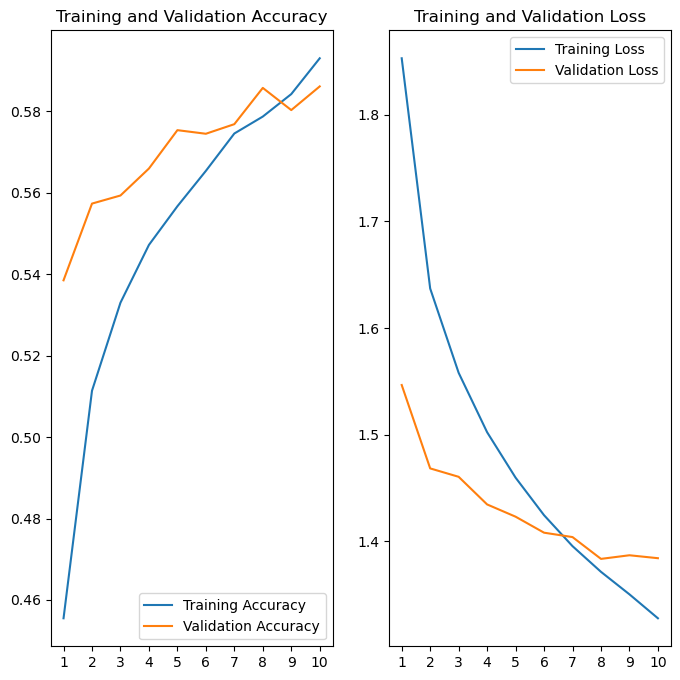

In [18]:
#application de la fonction de tracé
tracer_courbe_suivi("df_score_DL_franck.joblib",15)